In [ ]:
!cp "/content/data-20201031T071924Z-001.zip" "/content/drive/My Drive/data-20201031T071924Z-001.zip" 


In [ ]:
!unzip /content/data-20201031T071924Z-001.zip

Archive:  /content/data-20201031T071924Z-001.zip
   creating: data/tyre/tread wear indicator/
  inflating: data/cleaned.xlsx       
  inflating: data/cleaned.csv        
  inflating: data/tyre/normal.jpg    
  inflating: data/tyre/sidewallcracking.jpg  
  inflating: data/tyre/tread.jpg     
  inflating: data/tyre/linearair.png  
  inflating: data/tyre/tyrebulges.jpg  
  inflating: data/tyre/exposed.jpg   
  inflating: data/ec1.PNG            
  inflating: data/tyre/tread/00000095.gif  
  inflating: data/tyre/tread/00000099.jpg  
  inflating: data/export.pkl         
  inflating: data/tyre/tread/00000097.jpg  
  inflating: data/tyre/tread/00000082.jpg  
  inflating: data/tyre/tread/00000098.jpg  
  inflating: data/tyre/tread/00000096.jpg  
  inflating: data/tyre/tread/00000093.jpg  
  inflating: data/tyre/tread/00000086.jpg  
  inflating: data/tyre/tread/00000055.gif  
  inflating: data/tyre/tread/00000084.jpg  
  inflating: data/tyre/tread/00000074.jpg  
  inflating: data/tyre/tread/00

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"
from fastai.vision import *

     |████████████████████████████████| 753.4MB 18kB/s 
     |████████████████████████████████| 4.0MB 38.1MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [ ]:
base_dir = '/content/'
path = Path(base_dir + 'data/tyre')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
classes = ['exposed', 'linear air', 'normal', 'tread','tyre bulges', 'tyre sidewall cracking']

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

exposed


linear air


normal


tread


tyre bulges


tyre sidewall cracking


In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=6).normalize(imagenet_stats)

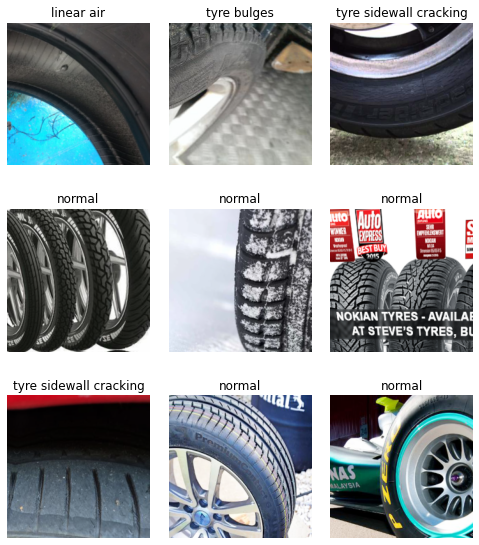

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
 len(data.train_ds), len(data.valid_ds)

(421, 105)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.943106,2.661111,0.704762,02:20
1,2.108550,2.096295,0.400000,02:20
2,1.678270,1.933500,0.380952,02:19
3,1.377821,1.897928,0.380952,02:19
4,1.192932,1.829933,0.371429,02:23


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.91E-06
Min loss divided by 10: 1.20E-04


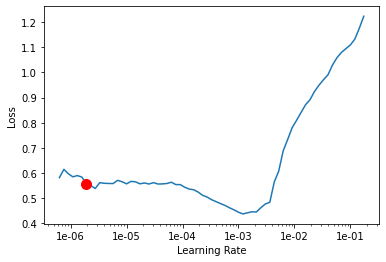

In [ ]:
learn.recorder.plot(suggestion=True)

In [ ]:

min_grad_lr = learn.recorder.min_grad_lr
min_grad_lr

1.9054607179632473e-06

In [ ]:
learn.fit_one_cycle(4, min_grad_lr)

epoch,train_loss,valid_loss,error_rate,time
0,0.656848,1.806155,0.371429,03:21
1,0.625509,1.789613,0.371429,03:20
2,0.599037,1.778228,0.371429,03:20
3,0.601576,1.764851,0.361905,03:20


In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('stage-2');


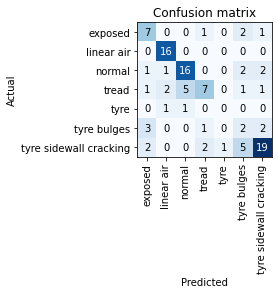

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export()

In [ ]:
defaults.device = torch.device('cpu')

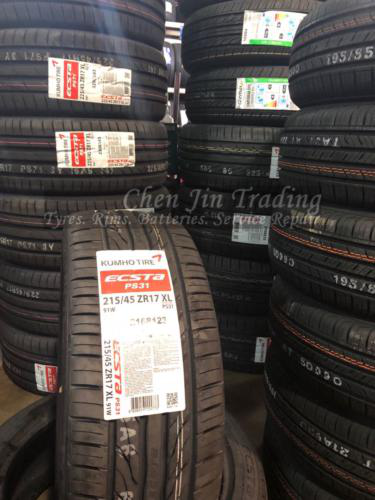

In [ ]:

img = open_image('/content/data/tyre/normal/00000000.jpg')
img

In [ ]:
learn = load_learner(path)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
if(pred_idx==1):
  print("Linear air")
elif(pred_idx==0):
  print("Exposed")
elif(pred_idx==2):
  print("Normal")
elif(pred_idx==3):
  print("Tread")
elif(pred_idx==5):
  print("Tyre Bulges")
elif(pred_idx==6):
  print("Tyre Sidewall Cracking")

Normal
